In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import math
import random


<h1>Initiates network</h1>
<p>Example of erdos_renyi, barabasi_albert, watts_strogatz, and  stochastic_block_model</p>

In [2]:
N=5000 # number of nodes

#G = nx.erdos_renyi_graph(N, p=0.0008,seed=None, directed=False)
#G=nx.barabasi_albert_graph(N, m=2)
#G = nx.watts_strogatz_graph(N, k = 4, p = 0.4)
sizes = [1000, 1000, 3000]
probs = [[0.001, 0.0001, 0.0001], [0.0001, 0.001, 0.0001], [0.0001, 0.0001, 0.002]]
ClusterRegion=3
clusterSize=100
clusterNo=3
G=nx.stochastic_block_model(sizes, probs, seed=0)


<h1>Network Properties</h1>
<h3>Number of nodes, edges, degree distribution</h3>

5000
10768


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

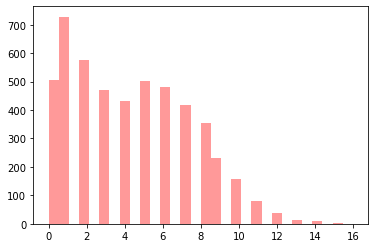

In [3]:
print(G.number_of_nodes())
print(G.number_of_edges())
G.degree
sns.distplot(sorted((d for n, d in G.degree()), reverse=True), kde = False, color ='red', bins = 30)

In [5]:
centrality = nx.eigenvector_centrality(G)
centralityArray=np.array(list(centrality.items()))
sc=sorted(centrality.items(), key=lambda x:x[1],reverse=True)
scList=list(sc)
scArray=np.array(scList)

<h1>An example of EON</h1>

In [8]:
tau=0.3
gamma=1
repli=1000
episizeA=np.zeros(ClusterRegion)
epicountA=np.zeros(ClusterRegion)
degreeA=np.zeros(ClusterRegion)
eigenvectorA=np.zeros(ClusterRegion)
episize=np.zeros((repli,ClusterRegion), dtype=int)
#aprint(episize)
for c in np.arange(ClusterRegion):
    #episize=0
    epicount=0
    
    for i in np.arange(repli):
        clu='cluster'+str(c)
    
        initial_infecteds=random.choice(clusterPd[clu])
        t, S, I, R=EoN.fast_SIR(G, tau, gamma, initial_infecteds)
        episize[i,c]=R[-1]
        if R[-1]>250:
            epicount=epicount+1

    episizeA[c]=np.mean(episize[:,c])
    epicountA[c]=epicount/repli
    print(epicount/repli)
    d=0
    for j in clusterPd[clu]:
            d=d+G.degree[j]
    degreeA[c]=d/clusterSize
    eigenvectorA[c]=np.mean(newCentralityArray[clusterPd[clu].astype('int').to_numpy(),1])


0.456
0.192
0.0


In [9]:
episize

array([[  13,    5,    2],
       [   2,    1,    1],
       [1726,    2,    1],
       ...,
       [1787,    5,    3],
       [1907,    1,    6],
       [1723,    3,    2]])

In [10]:
eigenvectorA

array([2.91376704e-02, 7.25719969e-03, 2.76140991e-07])

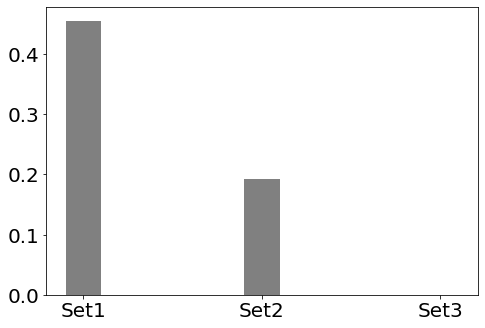

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
fig = plt.figure(1, (6,4))
ax = fig.add_axes([0,0,1,1])
c = [ 'saddlebrown', 'thistle', 'lightcoral']
langs = ['Set1', 'Set2', 'Set3']
count = epicountA
plt.bar(langs,(count),color='gray', width=0.2)
#ax.bar_label(count)
#plt.tight_layout()
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.rcParams["font.size"] = "20"

fig.savefig("SBMepicountA.png",dpi=300,bbox_inches='tight')

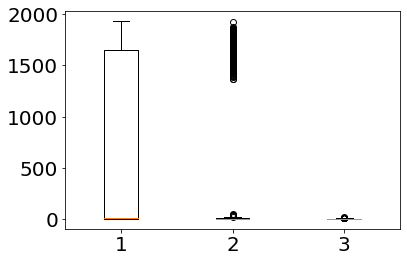

In [19]:
fig_box, ax_box = plt.subplots()
ax_box.boxplot(episize)
fig_box.savefig("SBMepidemicsize.png",dpi=300,bbox_inches='tight')